In [113]:
 import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
plt.style.use('seaborn')

In [19]:
os.getcwd()

'C:\\Users\\Abhishekh'

In [20]:
df=pd.read_csv('global_covid_confirmed_daily_updates.csv')
df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054
1,Albania,0,0,0,0,0,0,0,0,0,...,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197
2,Algeria,0,0,0,0,0,0,0,0,0,...,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831
3,Andorra,0,0,0,0,0,0,0,0,0,...,763,763,763,764,764,764,765,844,851,852
4,Angola,0,0,0,0,0,0,0,0,0,...,70,71,74,81,84,86,86,86,86,86


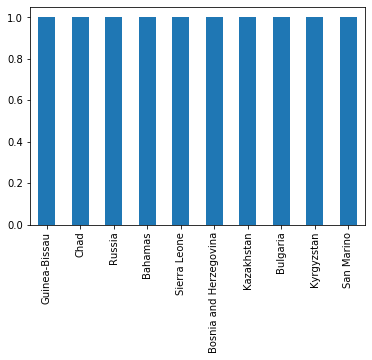

In [21]:
df['Country/Region'].value_counts().head(10).plot(kind='bar')

In [22]:
df.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country/Region,188,188,Guinea-Bissau,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/22/20,188,NaN,NaN,NaN,2.95213,39.965,0,0,0,0,548
1/23/20,188,NaN,NaN,NaN,3.47872,46.8925,0,0,0,0,643
1/24/20,188,NaN,NaN,NaN,5.00532,67.0921,0,0,0,0,920
1/25/20,188,NaN,NaN,NaN,7.62766,102.535,0,0,0,0,1406
...,...,...,...,...,...,...,...,...,...,...,...
5/31/20,188,NaN,NaN,NaN,32802.9,144026,2,361.25,1760.5,11594.5,1.79017e+06
6/1/20,188,NaN,NaN,NaN,33329,145846,2,371.25,1814,11980,1.81102e+06
6/2/20,188,NaN,NaN,NaN,33926.8,147969,2,395.25,1843,12433,1.83182e+06
6/3/20,188,NaN,NaN,NaN,34620.4,150115,4,413.5,1875.5,12995.5,1.85152e+06


In [23]:
df.dtypes

Country/Region    object
1/22/20            int64
1/23/20            int64
1/24/20            int64
1/25/20            int64
                   ...  
5/31/20            int64
6/1/20             int64
6/2/20             int64
6/3/20             int64
6/4/20             int64
Length: 136, dtype: object

In [24]:
df.shape

(188, 136)

In [25]:
df.columns

Index(['Country/Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       ...
       '5/26/20', '5/27/20', '5/28/20', '5/29/20', '5/30/20', '5/31/20',
       '6/1/20', '6/2/20', '6/3/20', '6/4/20'],
      dtype='object', length=136)

In [26]:
df.isna().sum()

Country/Region    0
1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
                 ..
5/31/20           0
6/1/20            0
6/2/20            0
6/3/20            0
6/4/20            0
Length: 136, dtype: int64

In [27]:
df['1/22/20'].value_counts()

0      182
1        3
2        2
548      1
Name: 1/22/20, dtype: int64

In [28]:
df.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,...,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02,1.880000e+02
mean,2.952128,3.478723,5.005319,7.627660,11.265957,15.569149,29.670213,32.797872,43.797872,52.803191,...,2.973205e+04,3.027548e+04,3.089865e+04,3.154671e+04,3.222881e+04,3.280290e+04,3.332900e+04,3.392679e+04,3.462040e+04,3.528184e+04
std,39.964996,46.892465,67.092123,102.534719,151.321394,209.810050,401.761253,443.912420,593.710369,714.840028,...,1.335368e+05,1.352763e+05,1.374411e+05,1.397302e+05,1.421473e+05,1.440260e+05,1.458457e+05,1.479693e+05,1.501146e+05,1.523677e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,4.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.262500e+02,3.262500e+02,3.322500e+02,3.335000e+02,3.530000e+02,3.612500e+02,3.712500e+02,3.952500e+02,4.135000e+02,4.347500e+02
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.486500e+03,1.509500e+03,1.562000e+03,1.626500e+03,1.697000e+03,1.760500e+03,1.814000e+03,1.843000e+03,1.875500e+03,1.894500e+03
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.131050e+04,1.142800e+04,1.147950e+04,1.152900e+04,1.155925e+04,1.159450e+04,1.198000e+04,1.243300e+04,1.299550e+04,1.355100e+04
max,548.000000,643.000000,920.000000,1406.000000,2075.000000,2877.000000,5509.000000,6087.000000,8141.000000,9802.000000,...,1.680913e+06,1.699176e+06,1.721753e+06,1.746019e+06,1.770165e+06,1.790172e+06,1.811020e+06,1.831821e+06,1.851520e+06,1.872660e+06


In [29]:
df.corr()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20
1/22/20,1.000000,0.999993,0.999986,0.999988,0.999991,0.999992,0.999993,0.999992,0.999991,0.999993,...,0.031382,0.030700,0.029902,0.029100,0.028274,0.027637,0.027048,0.026382,0.025679,0.025001
1/23/20,0.999993,1.000000,0.999993,0.999992,0.999991,0.999990,0.999990,0.999989,0.999987,0.999989,...,0.031087,0.030405,0.029607,0.028805,0.027980,0.027343,0.026754,0.026089,0.025386,0.024709
1/24/20,0.999986,0.999993,1.000000,0.999995,0.999992,0.999989,0.999986,0.999984,0.999981,0.999983,...,0.031810,0.031124,0.030325,0.029519,0.028689,0.028049,0.027456,0.026785,0.026081,0.025395
1/25/20,0.999988,0.999992,0.999995,1.000000,0.999996,0.999994,0.999993,0.999992,0.999990,0.999990,...,0.031137,0.030452,0.029655,0.028851,0.028025,0.027386,0.026794,0.026125,0.025425,0.024742
1/26/20,0.999991,0.999991,0.999992,0.999996,1.000000,0.999999,0.999995,0.999995,0.999993,0.999994,...,0.031995,0.031309,0.030509,0.029703,0.028874,0.028234,0.027642,0.026971,0.026266,0.025582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/31/20,0.027637,0.027343,0.028049,0.027386,0.028234,0.027652,0.026961,0.026886,0.026695,0.026862,...,0.998421,0.998945,0.999419,0.999753,0.999965,1.000000,0.999981,0.999853,0.999582,0.999141
6/1/20,0.027048,0.026754,0.027456,0.026794,0.027642,0.027061,0.026371,0.026297,0.026106,0.026273,...,0.998121,0.998698,0.999228,0.999620,0.999898,0.999981,1.000000,0.999925,0.999714,0.999334
6/2/20,0.026382,0.026089,0.026785,0.026125,0.026971,0.026393,0.025706,0.025631,0.025442,0.025609,...,0.997347,0.998042,0.998710,0.999242,0.999687,0.999853,0.999925,1.000000,0.999925,0.999697
6/3/20,0.025679,0.025386,0.026081,0.025425,0.026266,0.025690,0.025006,0.024932,0.024744,0.024910,...,0.996400,0.997217,0.998029,0.998703,0.999323,0.999582,0.999714,0.999925,1.000000,0.999919


In [30]:
df_death=pd.read_csv('global_covid_deaths_daily_updates.csv')
df_recov=pd.read_excel('Sample_Submission_Covid-19.xlsx')

In [31]:
df_death.head()
df_recov.head()

,Country/Region,Confirmed,Death
0,Afghanistan,4.5,0.0
1,Albania,6.0,0.0
2,Algeria,20.0,0.0
3,Andorra,1.0,0.0
4,Argentina,14.5,1.0


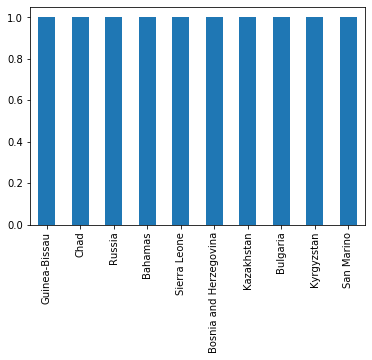

In [32]:
df_death['Country/Region'].value_counts().head(10).plot(kind='bar')

In [33]:
df_recov['Country/Region'].value_counts()

Bahrain                 1
Cyprus                  1
Romania                 1
Jordan                  1
Croatia                 1
                       ..
United Arab Emirates    1
Holy See                1
Greece                  1
Sweden                  1
Hungary                 1
Name: Country/Region, Length: 115, dtype: int64

In [37]:
df.columns
df_death.columns
df_recov.columns

Index(['Country/Region', 'Confirmed', 'Death'], dtype='object')

In [38]:
df.columns[4:]
df_death.columns[4:]
df_recov.columns[4:]

Index([], dtype='object')

In [40]:
dates = df.columns[4:]
df_long = df.melt(id_vars=[ 'Country/Region',], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')

df_death_long = df_death.melt(id_vars=[ 'Country/Region',], 
                            value_vars=dates, var_name='Date', value_name='Deaths')



print(df_long.shape)
print(df_death_long.shape)


(24816, 3)
(24816, 3)


In [42]:
df_long['Country/Region'].value_counts()

Sweden                132
Gambia                132
Honduras              132
San Marino            132
Kazakhstan            132
                     ... 
West Bank and Gaza    132
Belize                132
Papua New Guinea      132
Spain                 132
Albania               132
Name: Country/Region, Length: 188, dtype: int64

In [43]:
df_long['Date'].value_counts()

5/11/20    188
4/19/20    188
4/14/20    188
5/3/20     188
5/26/20    188
          ... 
2/8/20     188
4/28/20    188
2/2/20     188
3/21/20    188
5/15/20    188
Name: Date, Length: 132, dtype: int64

In [45]:

full_table = pd.merge(left=df_long, right=df_death_long, how='left',
                      on=[ 'Country/Region', 'Date'])
full_table = pd.merge(left=full_table, right=df_long, how='left',
                      on=['Country/Region', 'Date'])

full_table.head()

,Country/Region,Date,Confirmed_x,Deaths,Confirmed_y
0,Afghanistan,1/25/20,0,0,0
1,Albania,1/25/20,0,0,0
2,Algeria,1/25/20,0,0,0
3,Andorra,1/25/20,0,0,0
4,Angola,1/25/20,0,0,0


In [46]:
# Convert to proper date format
full_table['Date'] = pd.to_datetime(full_table['Date'])



In [47]:
full_table['Country/Region'] = full_table['Country/Region'].replace('Korea, South', 'South Korea')

# Greenland
full_table.loc[full_table['Country/Region']=='Greenland', 'Country/Region'] = 'Greenland'

# Mainland china to China
full_table['Country/Region'] = full_table['Country/Region'].replace('Mainland China', 'China')

In [48]:

# removing
# =======

# removing canada's recovered values
full_table = full_table[full_table['Country/Region'].str.contains('Recovered')!=True]

# removing county wise data to avoid double counting
full_table = full_table[full_table['Country/Region'].str.contains(',')!=True]

In [49]:
full_table['Active'] = full_table['Confirmed_x'] - full_table['Deaths'] 

# filling missing values 
# ======================
# fill missing province/state value with ''
full_table[['Country/Region']] = full_table[['Country/Region']].fillna('')
# fill missing numerical values with 0
cols = ['Confirmed_x', 'Deaths', 'Active']
full_table[cols] = full_table[cols].fillna(0)



# random rows
full_table.sample(10)

,Country/Region,Date,Confirmed_x,Deaths,Confirmed_y,Active
7674,Slovenia,2020-03-05,2,0,2,2
9732,Saint Vincent and the Grenadines,2020-03-16,1,0,1,1
22239,Eritrea,2020-05-22,39,0,39,39
22782,Chad,2020-05-25,687,61,687,626
3680,Maldives,2020-02-13,0,0,0,0
12396,Ukraine,2020-03-30,548,13,548,535
12932,Senegal,2020-04-02,195,1,195,194
11658,Algeria,2020-03-27,409,26,409,383
16311,Saint Lucia,2020-04-20,15,0,15,15
17936,Hungary,2020-04-29,2727,300,2727,2427


In [50]:
# Cleaning data
# =============

# fixing Country values
full_table.loc[full_table['Country/Region']=='Greenland', 'Country/Region'] = 'Greenland'

# Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed_x'] - full_table['Deaths'] 

# replacing Mainland china with just China
full_table['Country/Region'] = full_table['Country/Region'].replace('Mainland China', 'China')

# filling missing values 
full_table[['Country/Region']] = full_table[['Country/Region']].fillna('')
full_table[['Confirmed_x', 'Deaths', 'Active']] = full_table[['Confirmed_x', 'Deaths',  'Active']].fillna(0)


full_table.sample(10)


,Country/Region,Date,Confirmed_x,Deaths,Confirmed_y,Active
7218,Holy See,2020-03-03,0,0,0,0
7677,South Sudan,2020-03-05,0,0,0,0
12320,Liechtenstein,2020-03-30,62,0,62,62
16840,Maldives,2020-04-23,108,0,108,108
11815,Sri Lanka,2020-03-27,106,0,106,106
16903,Trinidad and Tobago,2020-04-23,115,8,115,107
8410,Qatar,2020-03-09,18,0,18,18
552,Ukraine,2020-01-27,0,0,0,0
1889,Austria,2020-02-04,0,0,0,0
13482,Peru,2020-04-05,2281,83,2281,2198


In [51]:
full_table.corr()

,Confirmed_x,Deaths,Confirmed_y,Active
Confirmed_x,1.000000,0.931008,1.000000,0.99966
Deaths,0.931008,1.000000,0.931008,0.92118
Confirmed_y,1.000000,0.931008,1.000000,0.99966
Active,0.999660,0.921180,0.999660,1.00000


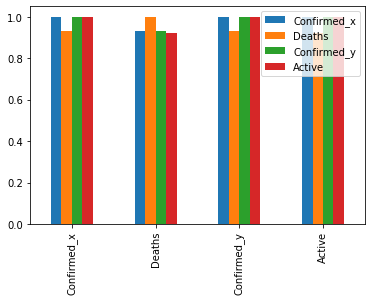

In [52]:
full_table.corr().plot(kind='bar')

In [53]:
# Grouped by day, country
# =======================

full_grouped = full_table.groupby(['Date', 'Country/Region'])['Confirmed_x', 'Deaths', 'Active'].sum().reset_index()

# new cases ======================================================
temp = full_grouped.groupby(['Country/Region', 'Date', ])['Confirmed_x', 'Deaths']
temp = temp.sum().diff().reset_index()

mask = temp['Country/Region'] != temp['Country/Region'].shift(1)

temp.loc[mask, 'Confirmed_x'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan


# renaming columns
temp.columns = ['Country/Region', 'Date', 'New cases', 'New deaths']
# =================================================================

# merging new values
full_grouped = pd.merge(full_grouped, temp, on=['Country/Region', 'Date'])

# filling na with 0
full_grouped = full_grouped.fillna(0)

# fixing data types
cols = ['New cases', 'New deaths']
full_grouped[cols] = full_grouped[cols].astype('int')

full_grouped['New cases'] = full_grouped['New cases'].apply(lambda x: 0 if x<0 else x)

full_grouped.head()

,Date,Country/Region,Confirmed_x,Deaths,Active,New cases,New deaths
0,2020-01-25,Afghanistan,0,0,0,0,0
1,2020-01-25,Albania,0,0,0,0,0
2,2020-01-25,Algeria,0,0,0,0,0
3,2020-01-25,Andorra,0,0,0,0,0
4,2020-01-25,Angola,0,0,0,0,0


In [54]:
# Day wise
# ========

# table
day_wise = full_grouped.groupby('Date')['Confirmed_x', 'Deaths', 
                                        'Active', 'New cases', 'New deaths',].sum().reset_index()

# number cases per 100 cases
day_wise['Deaths / 100 Cases'] = round((day_wise['Deaths']/day_wise['Confirmed_x'])*100, 2)


# no. of countries
day_wise['No. of countries'] = full_grouped[full_grouped['Confirmed_x']!=0] \
                                    .groupby('Date')['Country/Region'] \
                                    .unique() \
                                    .apply(len)\
                                    .values

# fillna by 0
cols = ['Deaths / 100 Cases']
day_wise[cols] = day_wise[cols].fillna(0)

day_wise.head()

,Date,Confirmed_x,Deaths,Active,New cases,New deaths,Deaths / 100 Cases,No. of countries
0,2020-01-25,1434,42,1392,0,0,2.93,11
1,2020-01-26,2118,56,2062,684,14,2.64,13
2,2020-01-27,2927,82,2845,809,26,2.80,16
3,2020-01-28,5578,131,5447,2651,49,2.35,16
4,2020-01-29,6166,133,6033,588,2,2.16,18


In [56]:
day_wise.to_csv('day_wise.csv', index=False)

In [57]:
day_wise.corr()

,Confirmed_x,Deaths,Active,New cases,New deaths,Deaths / 100 Cases,No. of countries
Confirmed_x,1.000000,0.996056,0.999981,0.878252,0.624590,0.776246,0.702184
Deaths,0.996056,1.000000,0.995487,0.878611,0.645401,0.803560,0.709578
Active,0.999981,0.995487,1.000000,0.877968,0.622951,0.774107,0.701460
New cases,0.878252,0.878611,0.877968,1.000000,0.881180,0.913320,0.889705
New deaths,0.624590,0.645401,0.622951,0.881180,1.000000,0.902779,0.838921
Deaths / 100 Cases,0.776246,0.803560,0.774107,0.913320,0.902779,1.000000,0.927082
No. of countries,0.702184,0.709578,0.701460,0.889705,0.838921,0.927082,1.000000


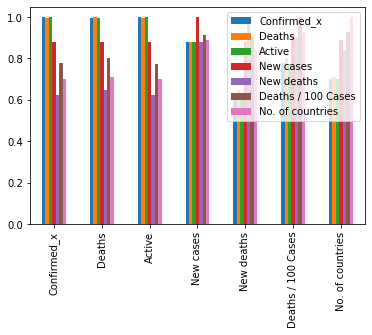

In [58]:
day_wise.corr().plot(kind='bar')

In [59]:
# Country wise
# ============

full_grouped['Date'] = pd.to_datetime(full_grouped['Date'])

# getting latest values
country_wise = full_grouped[full_grouped['Date']==max(full_grouped['Date'])] \
                    .reset_index(drop=True) \
                    .drop('Date', axis=1)

print(country_wise.shape)

# group by country
country_wise = country_wise.groupby('Country/Region')['Confirmed_x', 'Deaths', 
                                                       'Active', 
                                                      'New cases', 'New deaths'].sum().reset_index()
print(country_wise.shape)


# per 100 cases
country_wise['Deaths / 100 Cases'] = round((country_wise['Deaths']/country_wise['Confirmed_x'])*100, 2)

cols = ['Deaths / 100 Cases' ]
country_wise[cols] = country_wise[cols].fillna(0)



country_wise.head()

(188, 6)
(188, 6)


,Country/Region,Confirmed_x,Deaths,Active,New cases,New deaths,Deaths / 100 Cases
0,Afghanistan,18054,300,17754,787,6,1.66
1,Albania,1197,33,1164,13,0,2.76
2,Algeria,9831,681,9150,98,8,6.93
3,Andorra,852,51,801,1,0,5.99
4,Angola,86,4,82,0,0,4.65


In [60]:
country_wise.corr()

,Confirmed_x,Deaths,Active,New cases,New deaths,Deaths / 100 Cases
Confirmed_x,1.000000,0.933637,0.999716,0.772426,0.735383,0.141962
Deaths,0.933637,1.000000,0.924832,0.650444,0.688529,0.294553
Active,0.999716,0.924832,1.000000,0.776913,0.735044,0.131140
New cases,0.772426,0.650444,0.776913,1.000000,0.923679,0.046705
New deaths,0.735383,0.688529,0.735044,0.923679,1.000000,0.149216
Deaths / 100 Cases,0.141962,0.294553,0.131140,0.046705,0.149216,1.000000


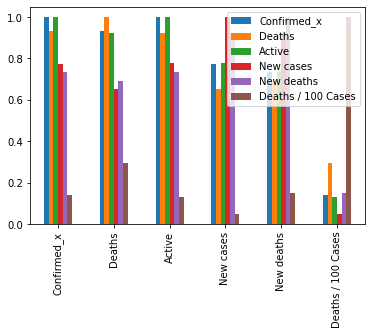

In [61]:
country_wise.corr().plot(kind='bar')

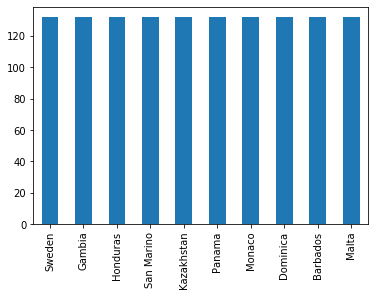

In [62]:
full_table['Country/Region'].value_counts().head(10).plot(kind='bar')

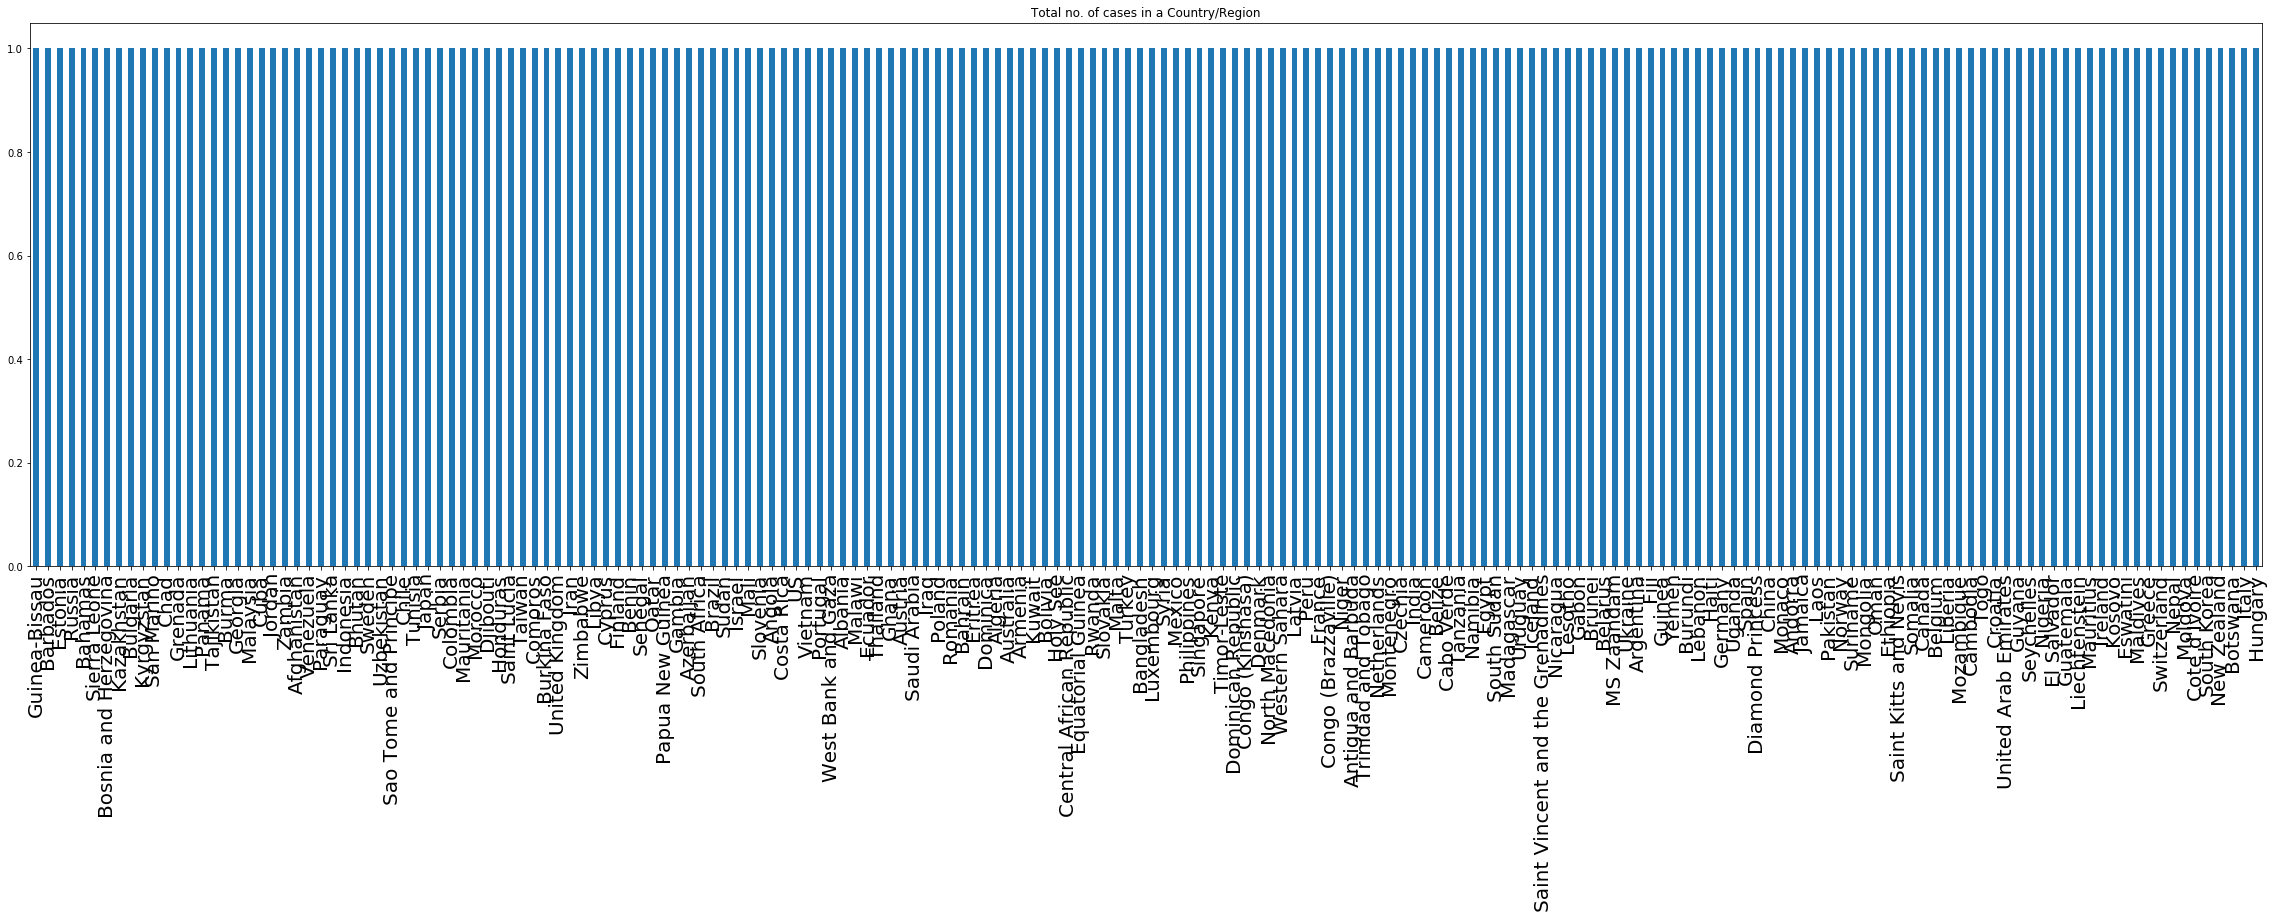

In [63]:

df_max_cases = full_table[['Country/Region']].copy()
df_max_cases.sort_values(by=['Country/Region'],inplace=True)
df_max_cases.drop_duplicates(subset=['Country/Region'], keep='first',inplace=True)
#Which country/region have most cases?
total_cases = df_max_cases['Country/Region'].value_counts() 
plot = total_cases.plot(kind='bar', title = "Total no. of cases in a Country/Region", figsize=(40,10))
                                                                                           
plt.xticks(fontsize = 20, rotation=90);

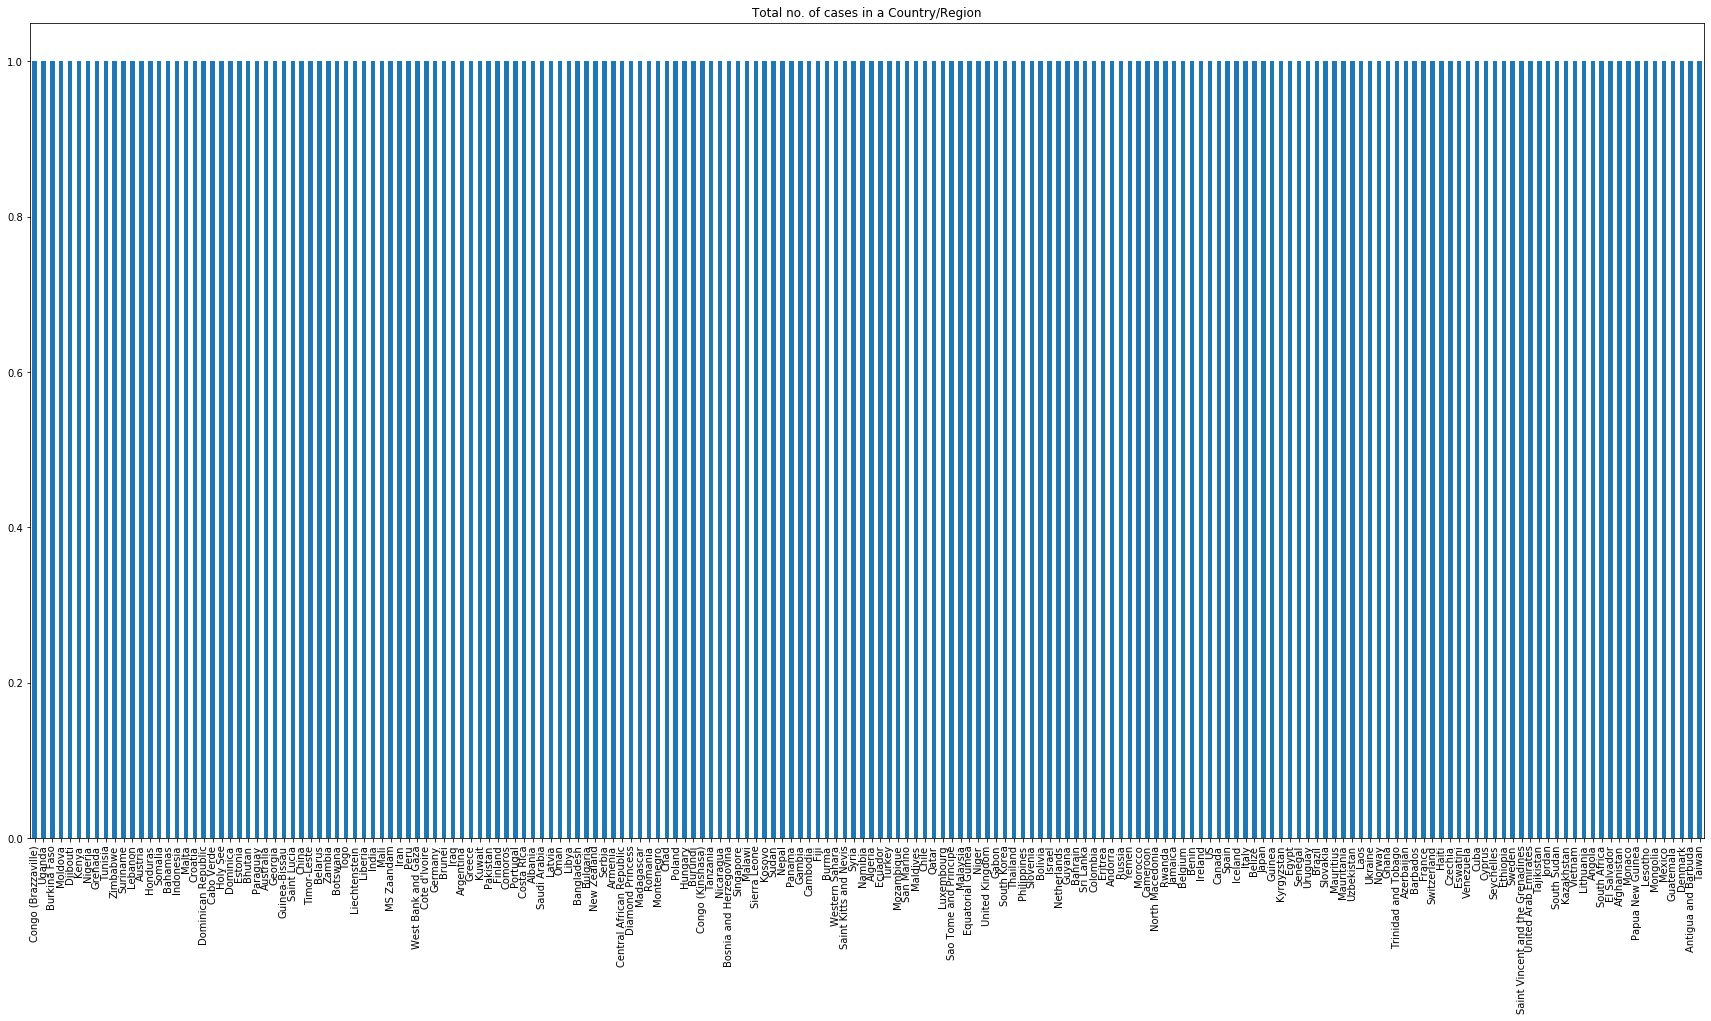

In [58]:
total_cases = df_max_cases['Country/Region'].value_counts() 
plot = total_cases.plot(kind='bar', title = "Total no. of cases in a Country/Region", figsize=(30,15))
plt.xticks(fontsize =10 , rotation=90);

In [64]:
cols= df.keys()
cols

Index(['Country/Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       ...
       '5/26/20', '5/27/20', '5/28/20', '5/29/20', '5/30/20', '5/31/20',
       '6/1/20', '6/2/20', '6/3/20', '6/4/20'],
      dtype='object', length=136)

In [65]:
confirmed= df.loc[:, cols[4]:cols[-1]]
death=df_death.loc[:,cols[4]:cols[-1]]

In [66]:
confirmed.head()

,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,...,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20
0,0,0,0,0,0,0,0,0,0,0,...,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054
1,0,0,0,0,0,0,0,0,0,0,...,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197
2,0,0,0,0,0,0,0,0,0,0,...,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831
3,0,0,0,0,0,0,0,0,0,0,...,763,763,763,764,764,764,765,844,851,852
4,0,0,0,0,0,0,0,0,0,0,...,70,71,74,81,84,86,86,86,86,86


In [67]:
#finding the total confirmed, death, and append to 3 empty lists
#also finding  the total mortality rate which is death_sum/confirmed_sum

dates=confirmed.keys()
world_cases =[]
total_deaths =[]
mortality_rate= []


for i in dates:
    confirmed_sum=confirmed[i].sum()
    death_sum=death[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    



In [68]:
#confirmed cases

confirmed_sum

6632985

In [69]:
death_sum

391136

In [70]:
world_cases

[1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79561,
 80406,
 81388,
 82746,
 84112,
 86011,
 88369,
 90306,
 92840,
 95120,
 97888,
 101806,
 105848,
 109822,
 113595,
 118623,
 125879,
 131007,
 145225,
 156120,
 167507,
 181653,
 197150,
 214873,
 242632,
 272264,
 304580,
 337022,
 378301,
 418295,
 467817,
 529722,
 593764,
 661174,
 720291,
 782816,
 857608,
 933010,
 1013863,
 1096324,
 1176436,
 1249743,
 1321436,
 1396438,
 1480232,
 1566102,
 1658261,
 1736412,
 1835145,
 1905165,
 1975566,
 2055748,
 2152181,
 2239990,
 2317636,
 2400787,
 2472109,
 2549046,
 2624608,
 2708403,
 2795731,
 2881140,
 2955033,
 3023722,
 3097229,
 3172287,
 3256910,
 3345558,
 3427584,
 3506729,
 3583055,
 3662691,
 3756069,
 3845718,
 3938064,
 4024009,
 4101699,
 4177502,
 4261747,
 4347018,
 4442163,
 45423

In [71]:
#converting dates and the cases in the form of a numpy array.

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases= np.array(world_cases).reshape(-1,1)
total_deaths= np.array(total_deaths).reshape(-1,1)

In [72]:
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [73]:
world_cases

array([[   1434],
       [   2118],
       [   2927],
       [   5578],
       [   6166],
       [   8234],
       [   9927],
       [  12038],
       [  16787],
       [  19881],
       [  23892],
       [  27635],
       [  30794],
       [  34391],
       [  37120],
       [  40150],
       [  42762],
       [  44802],
       [  45221],
       [  60368],
       [  66885],
       [  69030],
       [  71224],
       [  73258],
       [  75136],
       [  75639],
       [  76197],
       [  76819],
       [  78572],
       [  78958],
       [  79561],
       [  80406],
       [  81388],
       [  82746],
       [  84112],
       [  86011],
       [  88369],
       [  90306],
       [  92840],
       [  95120],
       [  97888],
       [ 101806],
       [ 105848],
       [ 109822],
       [ 113595],
       [ 118623],
       [ 125879],
       [ 131007],
       [ 145225],
       [ 156120],
       [ 167507],
       [ 181653],
       [ 197150],
       [ 214873],
       [ 242632],
       [ 2

In [74]:
total_deaths

array([[    42],
       [    56],
       [    82],
       [   131],
       [   133],
       [   171],
       [   213],
       [   259],
       [   362],
       [   426],
       [   492],
       [   564],
       [   634],
       [   719],
       [   806],
       [   906],
       [  1013],
       [  1113],
       [  1118],
       [  1371],
       [  1523],
       [  1666],
       [  1770],
       [  1868],
       [  2007],
       [  2122],
       [  2247],
       [  2251],
       [  2458],
       [  2469],
       [  2629],
       [  2708],
       [  2770],
       [  2814],
       [  2872],
       [  2941],
       [  2996],
       [  3085],
       [  3160],
       [  3254],
       [  3347],
       [  3459],
       [  3558],
       [  3801],
       [  3987],
       [  4263],
       [  4614],
       [  4912],
       [  5409],
       [  5832],
       [  6473],
       [  7151],
       [  7957],
       [  8824],
       [  9947],
       [ 11423],
       [ 13125],
       [ 14826],
       [ 16759

In [75]:
#future forecasting(predicting) for the next 10 days

days_in_future= 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [76]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [84]:
#for visulaization with the latest data of 4th june

latest_confirmed= df[dates[-1]]
latest_death= df_death [dates[-1]]

In [85]:
latest_confirmed

0      18054
1       1197
2       9831
3        852
4         86
       ...  
183      464
184        9
185      453
186     1089
187      237
Name: 6/4/20, Length: 188, dtype: int64

In [80]:
latest_death

0      300
1       33
2      681
3       51
4        4
      ... 
183      3
184      1
185    103
186      7
187      4
Name: 6/4/20, Length: 188, dtype: int64

In [81]:
#checking the list of unique countries

unique_countries=list(df['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',

In [82]:
#total number of confirmed cases in each country

country_confirmed_cases= []
no_cases= []

for i  in unique_countries:
    cases = latest_confirmed[df['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
            
for i in no_cases:
    unique_countries.remove(i)
    

for i in range(len(unique_countries)):
    country_confirmed_cases[i]= latest_confirmed[df['Country/Region']==unique_countries[i]].sum()


                                

In [83]:
#number of cases(confirmed) per Country/Region

print('df by Country/Regions:')
for i in range(len(unique_countries)):
    print (f'{unique_countries[i]}:{country_confirmed_cases[i]} cases')

df by Country/Regions:
Afghanistan:18054 cases
Albania:1197 cases
Algeria:9831 cases
Andorra:852 cases
Angola:86 cases
Antigua and Barbuda:26 cases
Argentina:20197 cases
Armenia:11221 cases
Australia:7247 cases
Austria:16805 cases
Azerbaijan:6522 cases
Bahamas:102 cases
Bahrain:13296 cases
Bangladesh:57563 cases
Barbados:92 cases
Belarus:45981 cases
Belgium:58767 cases
Belize:18 cases
Benin:261 cases
Bhutan:47 cases
Bolivia:12245 cases
Bosnia and Herzegovina:2594 cases
Botswana:40 cases
Brazil:614941 cases
Brunei:141 cases
Bulgaria:2585 cases
Burkina Faso:885 cases
Burma:236 cases
Burundi:63 cases
Cabo Verde:502 cases
Cambodia:125 cases
Cameroon:6789 cases
Canada:95269 cases
Central African Republic:1288 cases
Chad:828 cases
Chile:118292 cases
Colombia:33466 cases
Comoros:132 cases
Congo (Brazzaville):611 cases
Congo (Kinshasa):3644 cases
Costa Rica:1194 cases
Cote d'Ivoire:3262 cases
Croatia:2247 cases
Cuba:2119 cases
Cyprus:958 cases
Czechia:9494 cases
Denmark:12011 cases
Diamond Pri

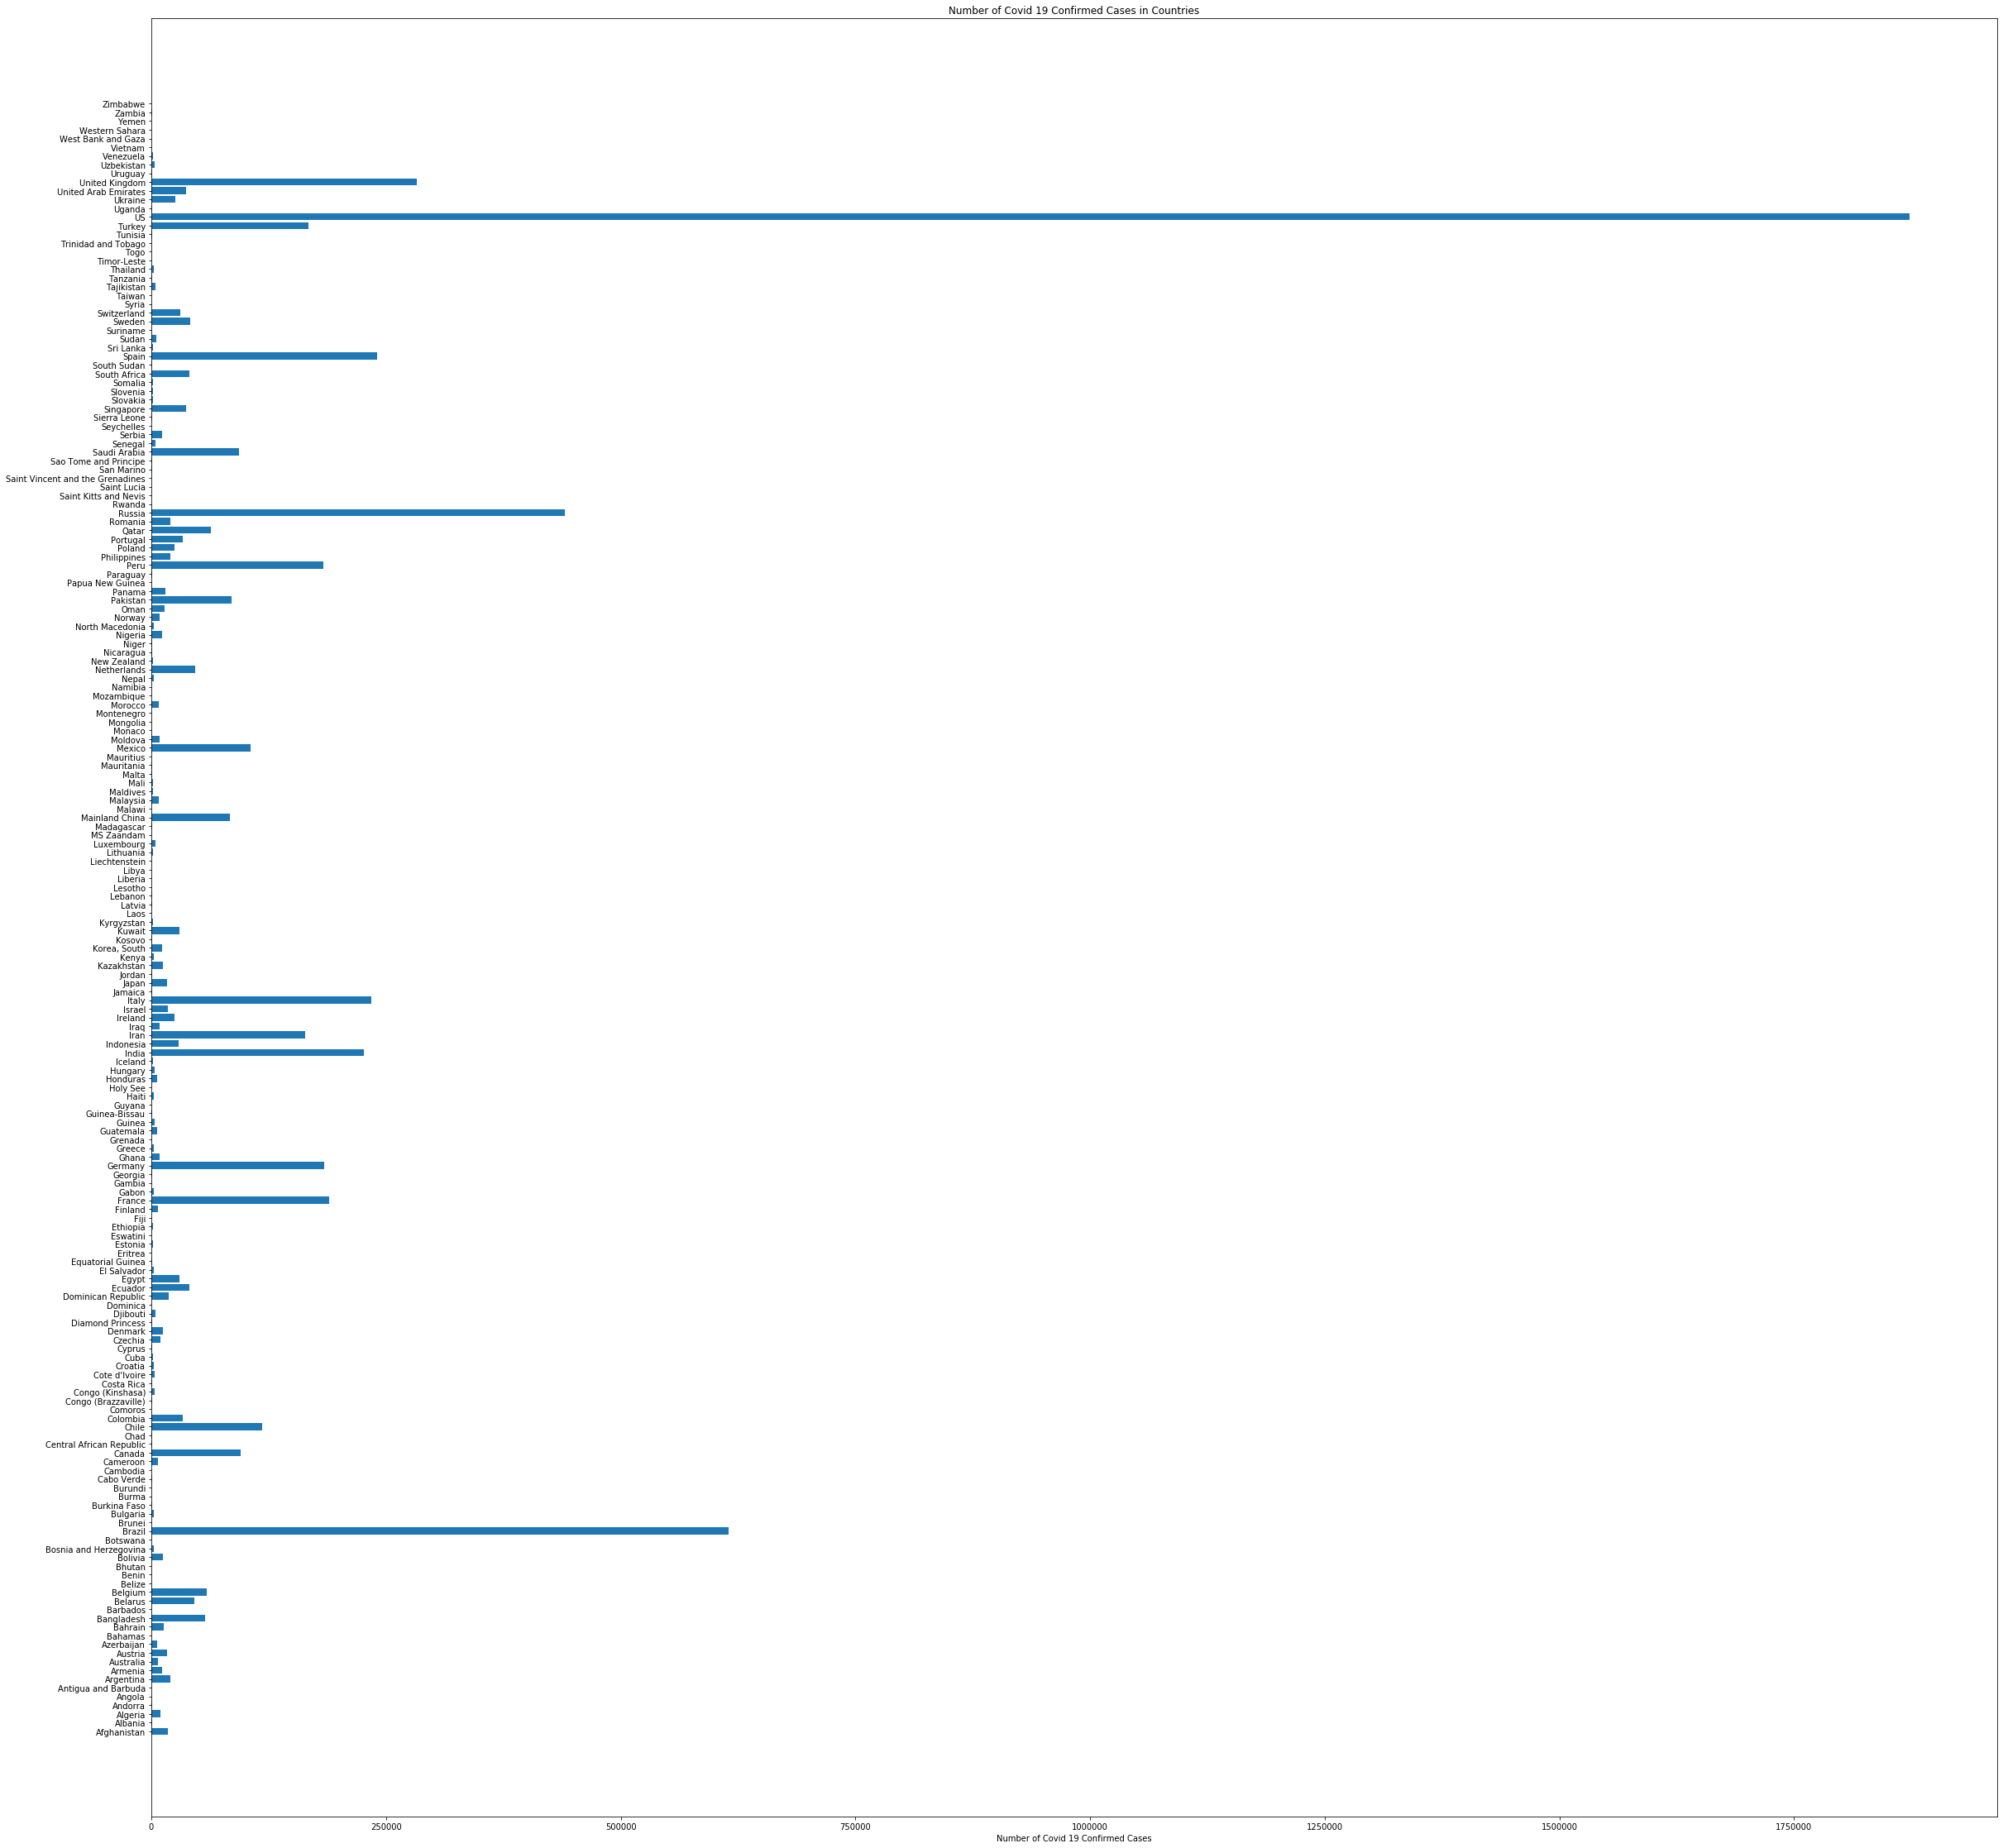

In [86]:
#plotting a bar graph  to find confirmed cases across different countries

plt.figure(figsize=(40,40))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid 19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid 19 Confirmed Cases')
plt.show()

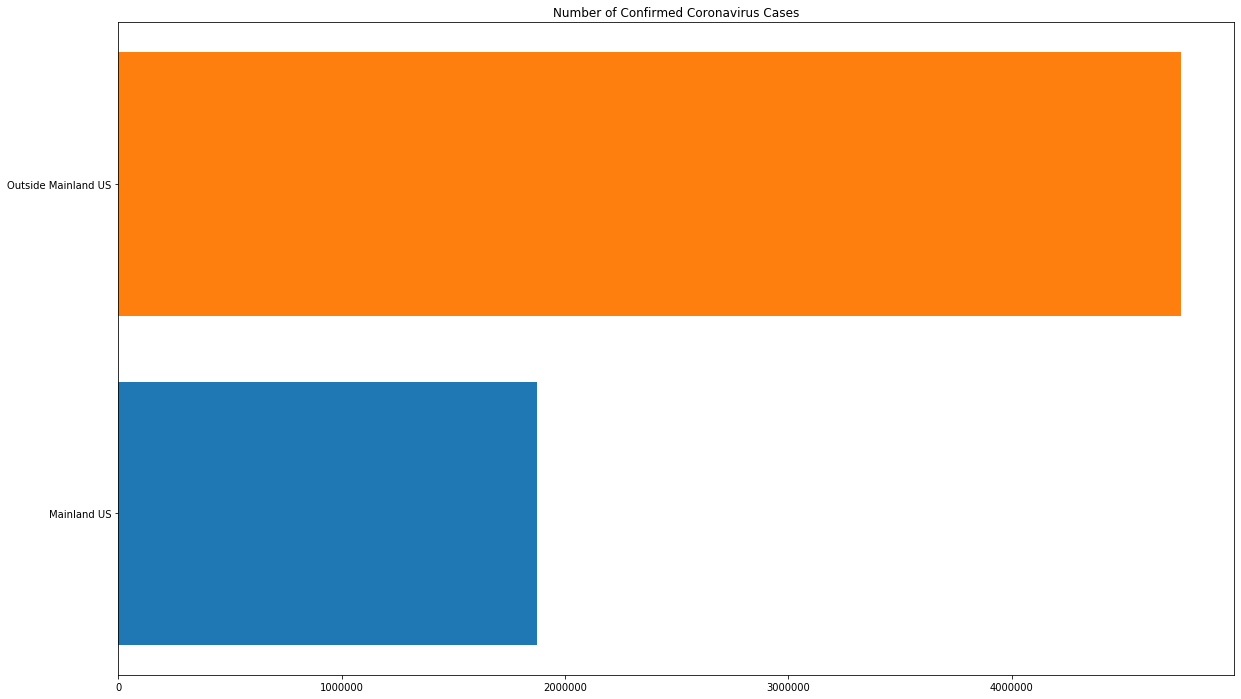

In [87]:
#plot a bar to see the total confirmed cases of Brazil(country with highest cases)

US_confirmed = latest_confirmed[df['Country/Region']=='US'].sum()
outside_mainland_US_confirmed = np.sum(country_confirmed_cases)-US_confirmed

plt.figure(figsize=(20,12))
plt.barh('Mainland US', US_confirmed)
plt.barh('Outside Mainland US', outside_mainland_US_confirmed)
plt.title('Number of Confirmed Coronavirus Cases')
plt.show()

In [88]:
#finding the total cases in mainland Brazil and outside of it

print('Outside Mainland US {} cases:' .format (outside_mainland_US_confirmed ))
print('Mainland US: {} cases'. format(US_confirmed))
print('Total:{} cases'.format(US_confirmed + outside_mainland_US_confirmed))

Outside Mainland US 4760325 cases:
Mainland US: 1872660 cases
Total:6632985 cases


In [89]:
#top 10 countries with the most confirmed cases & rest are grouped as others

visual_unique_countries= []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('others')    
visual_confirmed_cases.append(others)    


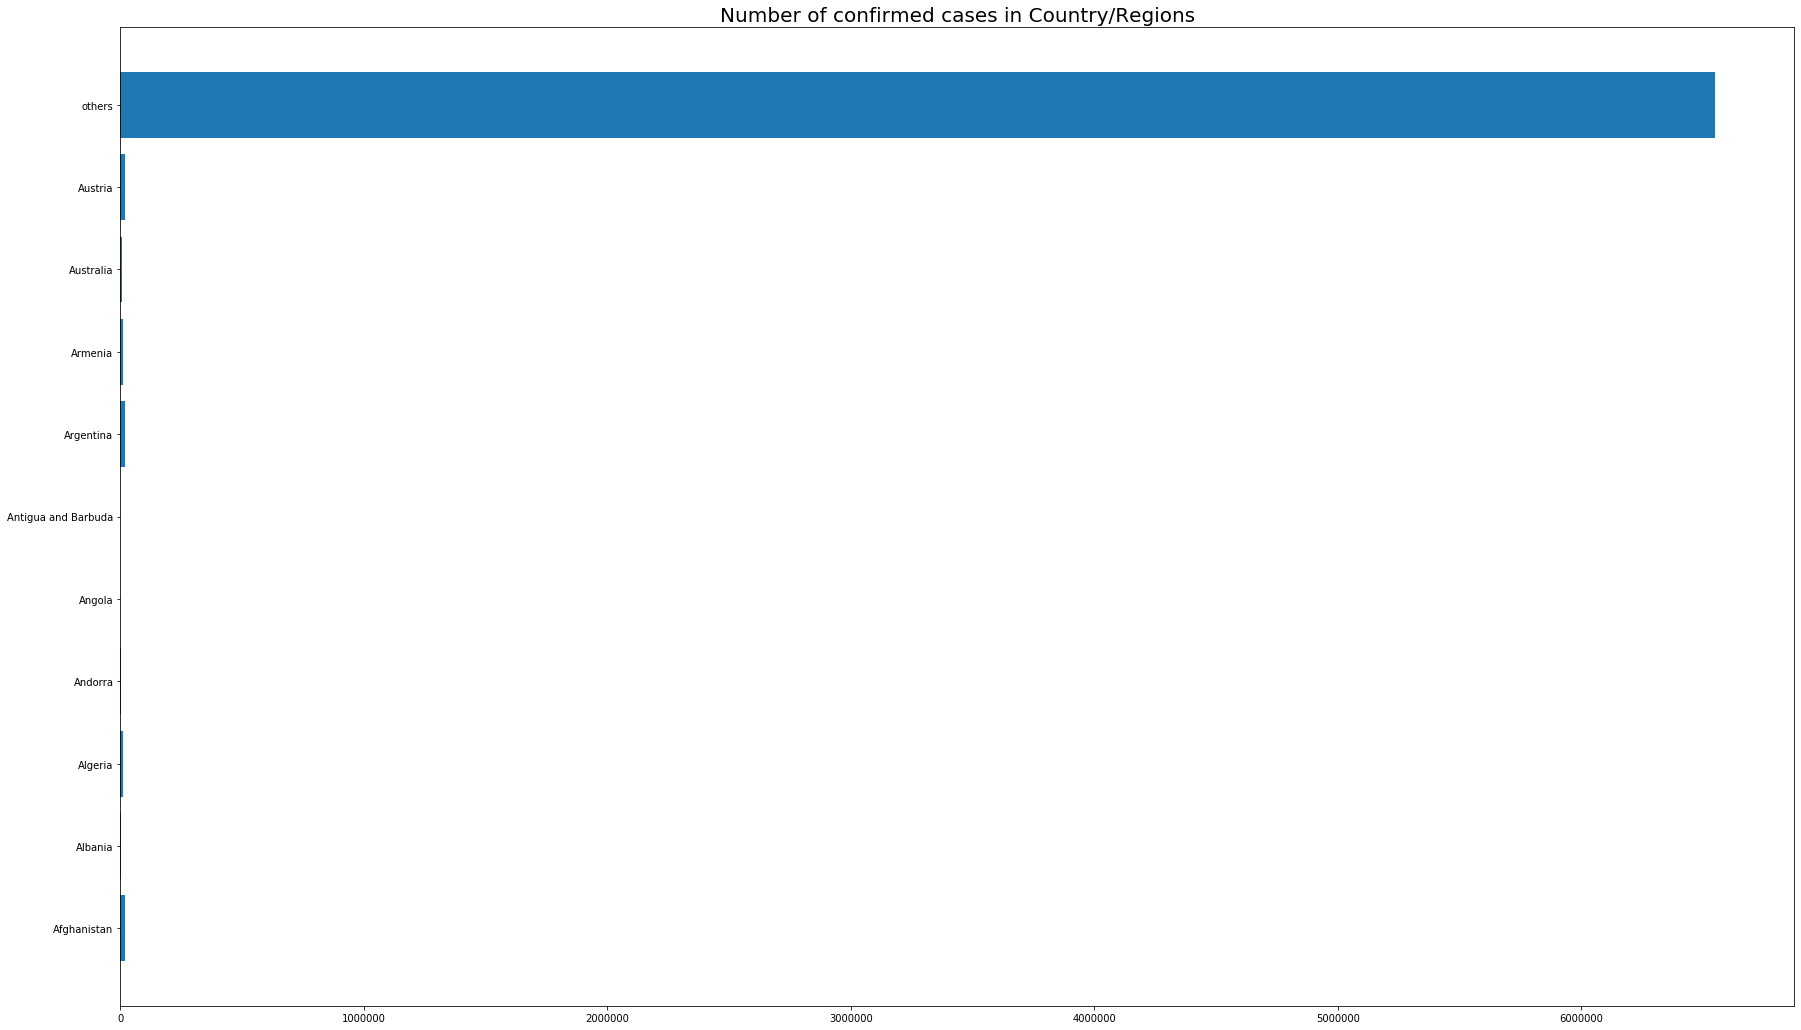

In [90]:
# visualizing the  top 10 countries

plt.figure(figsize=(30,18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title( 'Number of confirmed cases in Country/Regions', size=20)
plt.show()

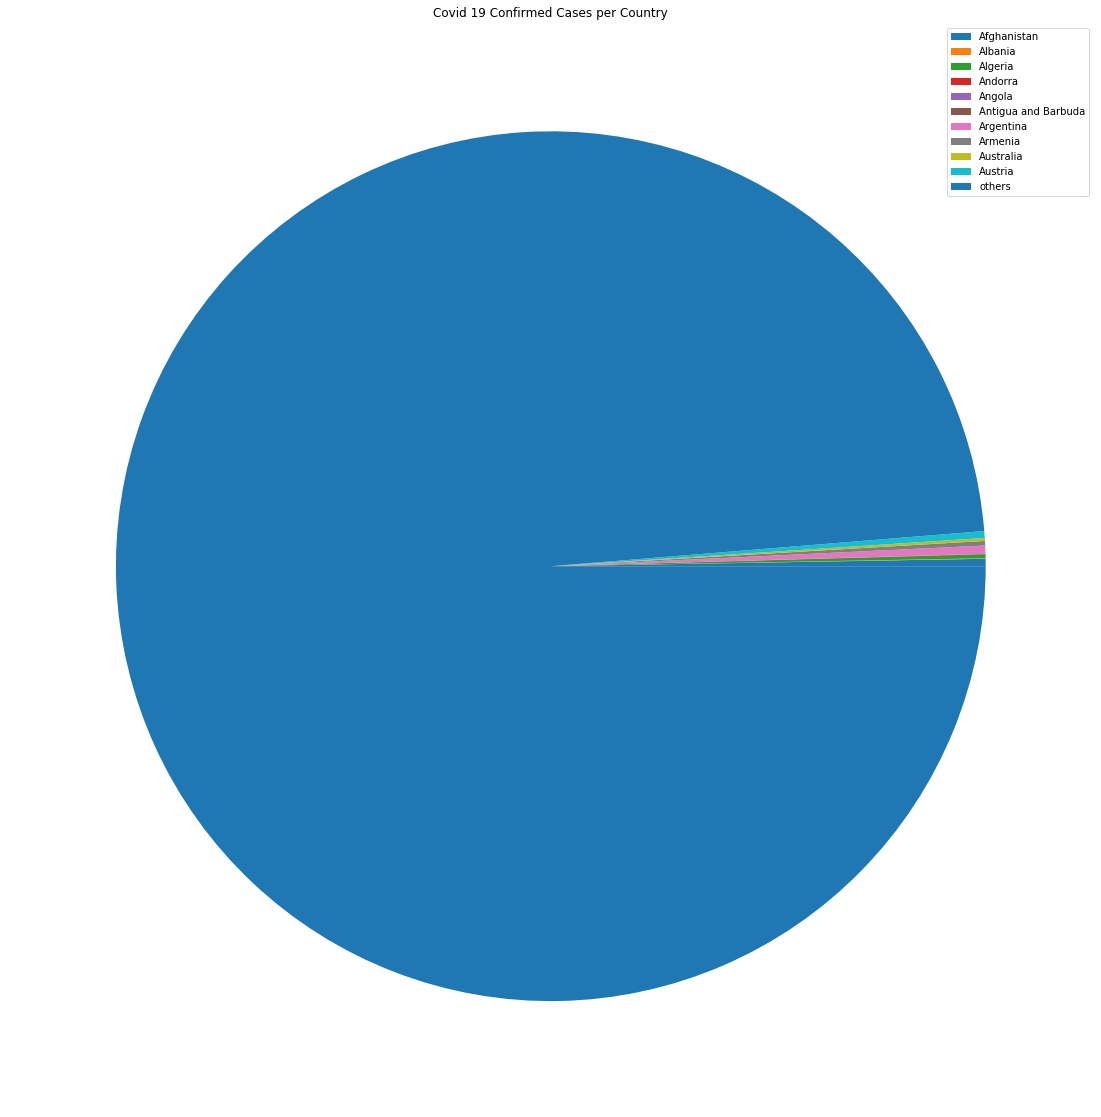

In [91]:
#creating a pie chart  for 10 countries


plt.figure(figsize=(20,20))
plt.title('Covid 19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases)
plt.legend(visual_unique_countries, loc='best')
plt.show()

In [123]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(confirmed, death,random_state=0)


In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
linear_model= LinearRegression()

In [95]:
linear_model.fit(X_train_confirmed, y_train_confirmed)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
test_linear_pred= linear_model.predict(X_test_confirmed)

In [118]:
linear_pred= linear_model.predict(future_forecast)
linear_pred


ValueError: shapes (142,1) and (132,132) not aligned: 1 (dim 1) != 132 (dim 0)

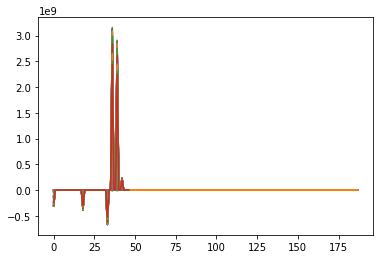

In [99]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

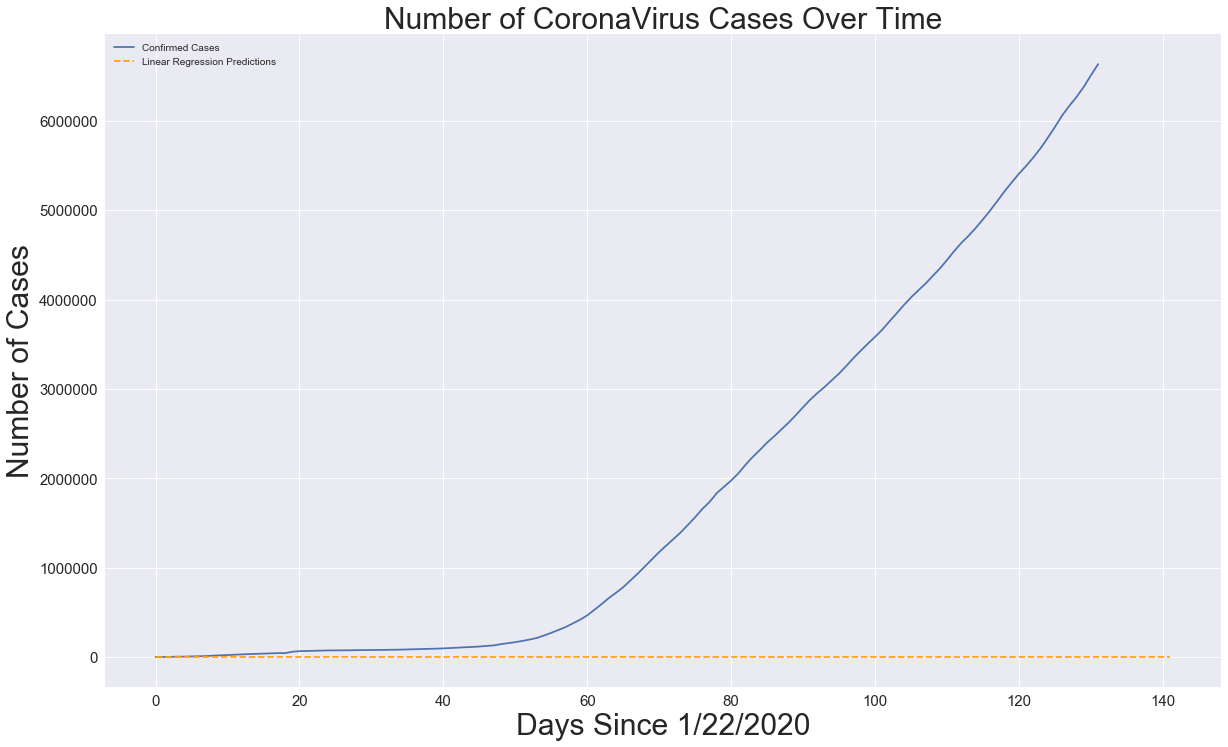

In [115]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast,linestyle= 'dashed', color ='orange')
plt.title('Number of CoronaVirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size =30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

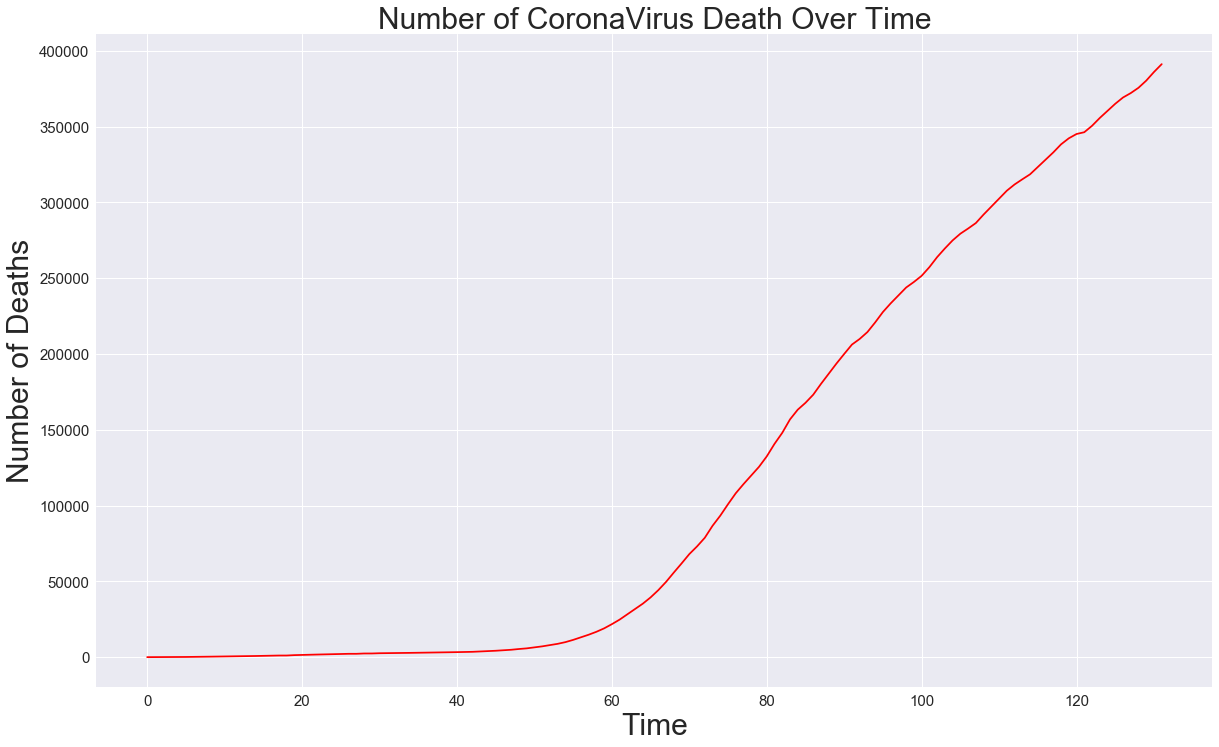

In [119]:
#total deaths over time
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,total_deaths,color='red')

plt.title('Number of CoronaVirus Death Over Time', size=30)
plt.xlabel('Time', size =30)
plt.ylabel('Number of Deaths', size=30)

plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

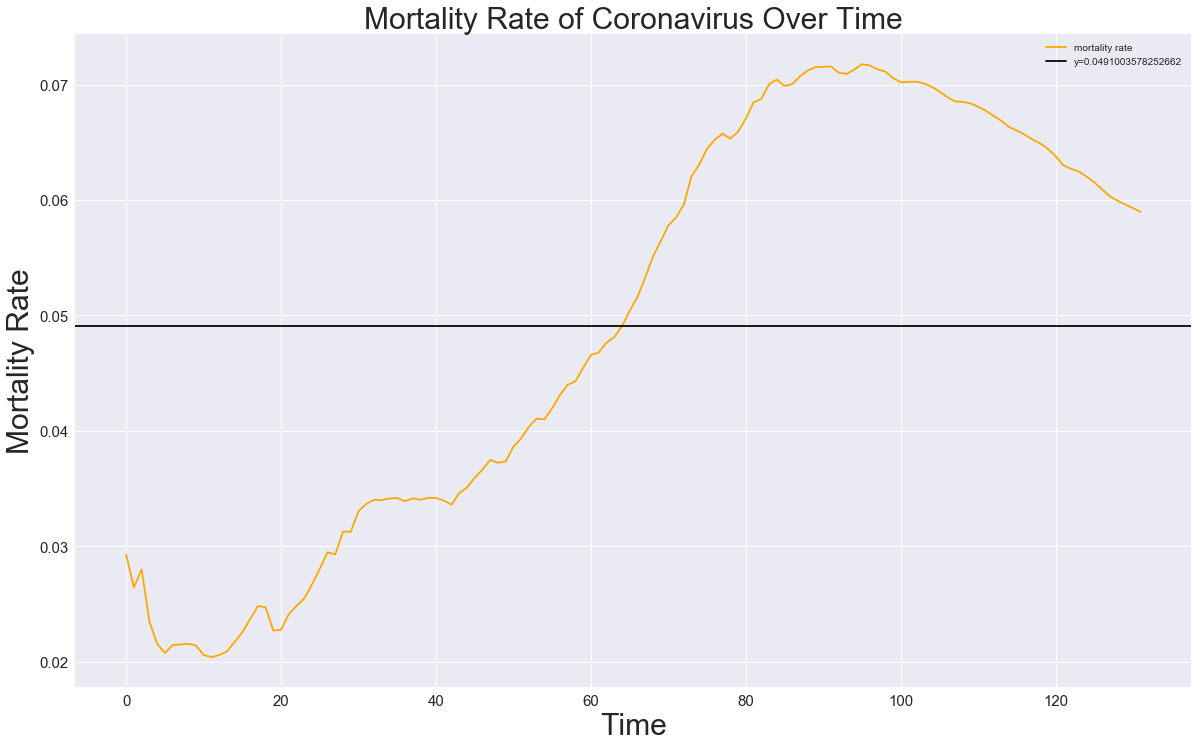

In [121]:
mean_mortality_rate=np.mean(mortality_rate)
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, mortality_rate,color='orange')
plt.axhline(y=mean_mortality_rate, color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time', size =30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()